## Symbolic algebra: sympy for physics

## 1. Lennard-Jones Potential and Forces (optimisation)

The potential energy of a particle in a field has the form:

$$V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right]$$

where $r$ is the distance between the particles, $\epsilon$ is the depth of the potential well describing the strength of the attraction, and $\sigma$ is the distance at which the potential energy is zero.

(a) Create a python function to compute this potential $V(r)$ as a function of $r$ for fiducial values of $\epsilon$ and $\sigma$.

Then, create an appropriate vector for $r$ and plot this potential $V(r)$ versus $r$.

(b) Use sympy to compute the force: $F(r)=-\frac{dV}{dr}$ experienced by a particle at a distance $r$.

Then, lambdify your expression and plot the $F(r)$ versus $r$.

(c) Find the maximum possible value of the attractive force, $F_{max}$, and the distance, $r_{max}$, at which the particle would be subjected to this force.

#### Please provide your answers to these questions in a markdown cell:

(d) Describe the behavior of the potential at short and long distances.

At which "equilibrium" distance, $r_0$, does the force become zero?

(e) Discuss the physical significance of the Lennard-Jones potential in real-world systems (e.g. the meaning of $\sigma$ and $\epsilon$).

Provide 2 examples of systems where this potential is applicable.


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

### (a) Create a python function to compute this potential $V(r)$ as a function of $r$ for fiducial values of $\epsilon$ and $\sigma$.
$$V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right]$$

In [2]:
# Function for the potential
def v_potential(r, eps, sig):
    """
    This function calculates the LJ potential between any 2 particles.
    Inputs: r   -> radial coordinate
            eps -> Depth of V(r)
            sig -> Distance at which V(r) minimum
    Output: v_r -> V(r)
    """
    # Define the potential
    v_r = 4*eps*((sig/r)**12 - (sig/r)**6)

    return v_r
    

In [4]:
# Test our function
#v_potential(1., 0.1, 0.2)

### Then, create an appropriate vector for $r$ and plot this potential $V(r)$ versus $r$.

In [30]:
# Fix the constants
eps_1 = 2.
sig_1 = 1.

# Generate vector for r
r = np.linspace(1.e-4, 4*sig_1, 1000)

# Evaluate our function
v_r = v_potential(r, eps_1, sig_1)

In [31]:
print(np.min(v_r), np.max(v_r))

-1.9999072482437703 8e+48


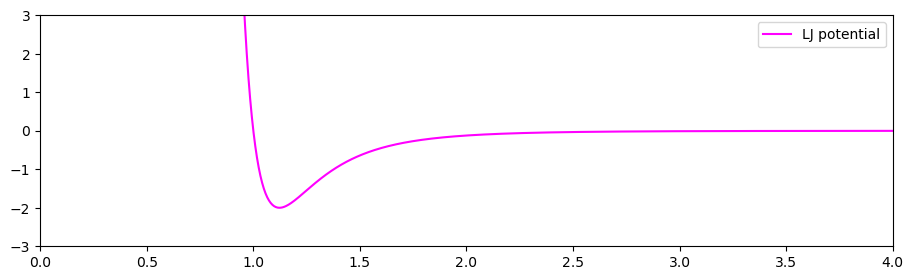

In [33]:
# Figure environment
plt.figure(figsize=(11, 3))

plt.plot(r, v_r, color = "magenta", linestyle = "-", label = "LJ potential")

plt.legend(loc = 1)

plt.xlim(0, 4.*sig_1)
plt.ylim(-1.5*eps_1, + 1.5*eps_1)

plt.show()

(b) Use sympy to compute the force: $F(r)=-\frac{dV}{dr}$ experienced by a particle at a distance $r$.

## 2. Population dynamics (solutions to ODEs)

The **Verhulst-Pearl model** is used to study animal population dynamics. This model is also called **logistic growth model** and assumes that $P(t)$ satisfies the following ODE:


$$\frac{dP}{dt}=\alpha\,P\left(1-\frac{P}{\beta}\right)$$


where $\alpha$ is the growth rate and $\beta$ is the limiting size for the population (also called the environment carrying capacity).

(a) Use sympy to find the general analytical solution to this ODE.


(b) Imagine we use this equation to study the population dynamics of a bird species re-introduced into nature, knowing that the test environment can only host $20$ individuals. We liberate $10$ individuals of this species in the wild, and we know that the growth rate is $0.2$ individuals per month. Rewrite and recompute both the ODE and its solution for this set of conditions.


(c) Lambify your expression, make a plot of the analytical solution and label it appropriately.


#### Please provide your answers to these questions in a markdown cell:

(d) Briefly comment on the behavior of the population size over time, and the eventual population size as $t \to \infty$.

What are the biological interpretations of the parameters $\alpha$ and $\beta$ ? 

(e) Why does the population growth slow down as $P(t)$ approaches $\beta$ ?

How might the model change if external factors (e.g., predators, diseases, or resource scarcity) are introduced?